In [2]:
import pandas as pd

In [3]:
# Leer / Cargar los datos

In [7]:
# lee valores separados POR COMA
ordenes = pd.read_csv('instacart_orders.csv', sep=';')

In [ ]:
# La estructura / forma de los datos
# Ver los datos

In [8]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [9]:
ordenes.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
# _id o id_ => identificador unico, un numero o texto unico que identifica algo

In [ ]:
# Entrevistas con los expertos de los datos en la empresa
# order_number = numero de factura. ej: 11 => es la factura numero 11, hubieron 10 facturas antes
# order_dow = dia de la semana 0-6, donde lunes es 1 y domingo 0
# order_hour_of_day = hora de compra 0-23, 0 - 12AM
# days_since_prior_order = dias que han pasado desde que se hizo la ultima orden/compra

In [10]:
# Calidad de datos

In [ ]:
# Precision: revisar duplicados

In [13]:
facturas_repetidas = ordenes.duplicated().sum()

In [14]:
print(f'Hay un total de {facturas_repetidas} facturas repetidas')

Hay un total de 15 facturas repetidas


In [ ]:
# Estudiarlas

In [15]:
ordenes[ordenes.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [ ]:
# Todas las facturas duplicadas son de los miercoles a las 2am

In [16]:
ordenes.query('order_id == 2845099')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
142258,2845099,31189,11,3,2,7.0
284038,2845099,31189,11,3,2,7.0


In [ ]:
# TODAS las ventas de los miercoles a las 2am se repiten?
# NO -> apenas un 12% de ellas son repetidas

In [18]:
facturas_miercoles_2am = ordenes.query('order_dow == 3 and order_hour_of_day == 2')

In [21]:
porcertaje_repetidos = facturas_repetidas / len(facturas_miercoles_2am)

In [24]:
print(f'Las facturas repetidas representan un {porcertaje_repetidos*100}% del total de facturas de los miercoles a las 2am')

Las facturas repetidas representan un 12.396694214876034% del total de facturas de los miercoles a las 2am


In [25]:
# Completitud -> Valores ausentes

In [27]:
ordenes.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [30]:
ordenes_con_celdas_faltantes = ordenes[ordenes['days_since_prior_order'].isna()]

In [64]:
ordenes_con_celdas_faltantes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [ ]:
# 0 -> ENSUCIO / DAÑO LOS DATOS -> ES BASURA
# -1

In [ ]:
# TODAS las filas que tienen valor ausente en days_since_prior_order es la primera compra?

In [31]:
len(ordenes_con_celdas_faltantes)

28819

In [33]:
primeras_compras = ordenes.query('order_number == 1')

In [34]:
# Comprobacion debil
if len(ordenes_con_celdas_faltantes) == len(primeras_compras):
    print('Todas las filas con valores ausentes son de las primeras compras')

# Comprobacion fuerte: vean que todos los IDs de ordenes esten en ambos lados

Todas las filas con valores ausentes son de las primeras compras


In [36]:
ordenes_con_celdas_faltantes['order_number'].unique()

array([1])

In [37]:
# Limpieza de datos

In [38]:
ordenes.drop_duplicates(inplace=True)

In [39]:
ordenes['days_since_prior_order'].fillna(-1, inplace=True)

In [40]:
# Comprobacion final

In [41]:
ordenes.duplicated().sum()

0

In [42]:
ordenes.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [44]:
# Cual(es) son los mejores dias de venta?

In [47]:
ventas_por_dia = ordenes.groupby('order_dow')['order_id'].count()

In [54]:
ventas_por_dia

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

In [55]:
ventas_por_dia.index = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']

<Axes: title={'center': ' # Facturas por dia de la semana'}, xlabel='Dia de la semana', ylabel='Total facturas'>

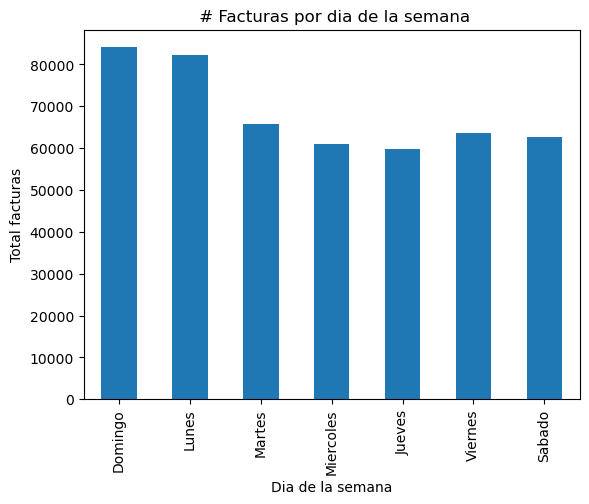

In [62]:
ventas_por_dia.plot(kind='bar', title = ' # Facturas por dia de la semana', xlabel = 'Dia de la semana', ylabel = 'Total facturas')

In [65]:
# Los mejores dias con mayores ventas son el domingo y el lunes, siendo el domingo el dia con mayor ventas

In [67]:
# order_hour_of_day

In [ ]:
# Como se ve las ventas por hora?

In [68]:
ventas_por_hora = ordenes.groupby('order_hour_of_day')['order_id'].count()

In [73]:
import matplotlib.pyplot as plt

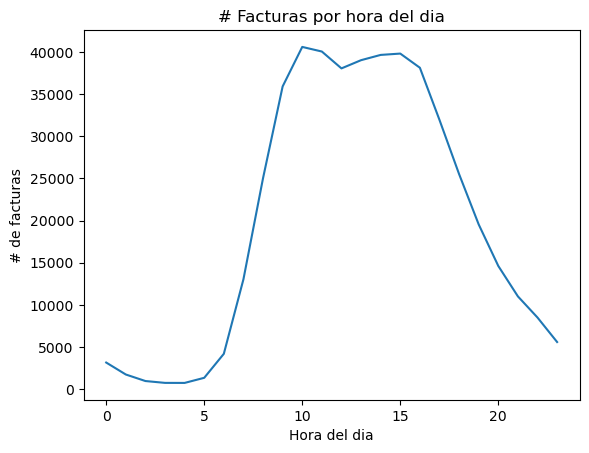

In [74]:
ventas_por_hora.plot(kind='line', xlabel='Hora del dia', ylabel='# de facturas', title='# Facturas por hora del dia')
plt.show()

In [ ]:
# Como se ve las ventas por hora de los dias pico

In [75]:
ventas_domingo = ordenes.query('order_dow == 0')
ventas_lunes = ordenes.query('order_dow == 1')

In [82]:
ventas_domingo_por_hora = ventas_domingo.groupby('order_hour_of_day')['order_id'].count()
ventas_lunes_por_hora = ventas_lunes.groupby('order_hour_of_day')['order_id'].count()

ventas_domingo_por_hora.name = 'Domingo'
ventas_lunes_por_hora.name = 'Lunes'

In [83]:
ventas_lunes_por_hora

order_hour_of_day
0      565
1      269
2      145
3      104
4      104
5      246
6      757
7     2320
8     4751
9     7262
10    7881
11    7194
12    6648
13    6618
14    6545
15    6446
16    6050
17    5125
18    4075
19    3126
20    2332
21    1698
22    1165
23     759
Name: Lunes, dtype: int64

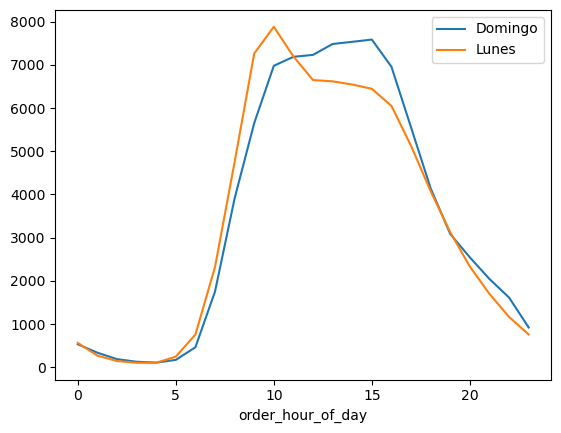

In [84]:
ventas_domingo_por_hora.plot(kind='line', legend='Domingo')
ventas_lunes_por_hora.plot(kind='line', legend='Lunes')
plt.show()

In [85]:
# Cuales son mi top 20 mejores productos?
# Segun que?

In [87]:
# Basado en el que mas se compra

In [89]:
ordenes_detalle = pd.read_csv('order_products.csv', sep=';')

In [108]:
productos = pd.read_csv('products.csv', sep=';')

In [109]:
productos.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [90]:
ordenes_detalle

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [91]:
ordenes_detalle.duplicated().sum()

0

In [92]:
ordenes_detalle.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [93]:
ordenes_detalle.fillna(-1, inplace=True)

In [111]:
ordenes_detalle_full = ordenes_detalle.merge(productos, on='product_id')

In [112]:
ordenes_detalle_full

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14.0,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10.0,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2.0,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1.0,0,Total Mint Stripe Gel Toothpaste,20,11


In [113]:
ventas_por_producto = ordenes_detalle_full.groupby(['product_id', 'product_name'])['order_id'].count()

In [114]:
ventas_por_producto.sort_values(ascending=False, inplace=True)

<Axes: xlabel='product_id,product_name'>

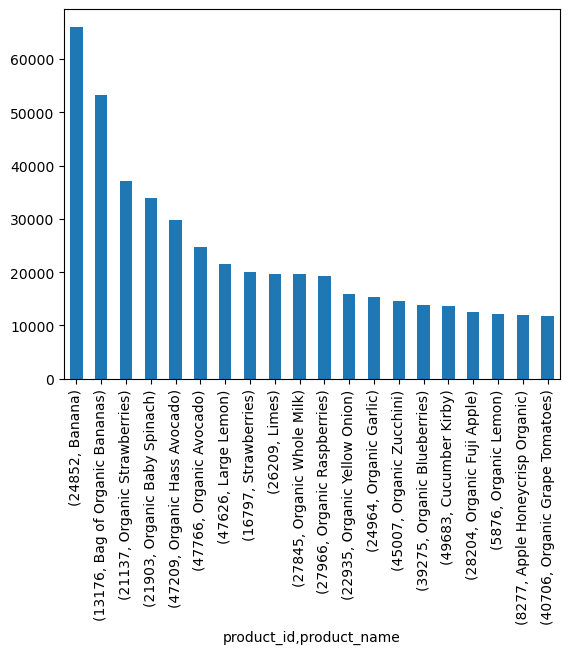

In [115]:
ventas_por_producto.head(20).plot(kind='bar')